In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load the data to python Environment**

In [ ]:
car_data=pd.read_csv('/content/car_age_price.csv')
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
##to check missing values
car_data.isna().sum()

Year     0
Price    0
dtype: int64

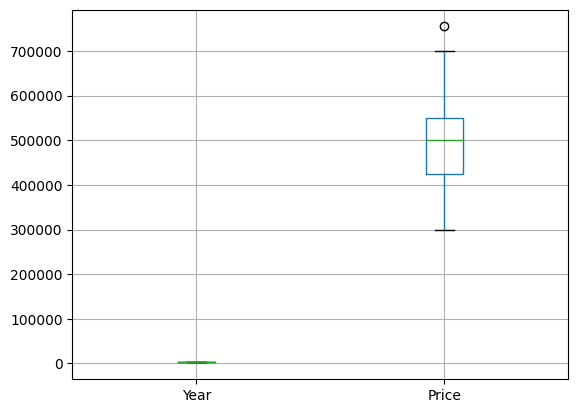

In [5]:
car_data.boxplot()
plt.show()

**Outliers**

In [6]:
##Outliers
Q1=np.percentile(car_data['Price'],25,method='midpoint')
Q2=np.percentile(car_data['Price'],50,method='midpoint')
Q3=np.percentile(car_data['Price'],75,method='midpoint')
print("Q1 is:",Q1)
print("Q2 is:",Q2)
print("Q3 is:",Q3)
IQR=Q3-Q1  ##Inter quartile range
print(IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("lower limit :",low_lim)
print("upper limit:",up_lim)
outliers=[]
for x in car_data['Price']:
  if((x < low_lim)or(x >up_lim)):
    outliers.append(x)
print(outliers)

Q1 is: 422500.0
Q2 is: 500000.0
Q3 is: 550000.0
127500.0
lower limit : 231250.0
upper limit: 741250.0
[755000]


In [7]:
index_out=car_data['Price']>up_lim
car_data.loc[index_out].index

Int64Index([1], dtype='int64')

In [8]:
car_data.drop([1],inplace=True)##droping

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    111 non-null    int64
 1   Price   111 non-null    int64
dtypes: int64(2)
memory usage: 2.6 KB


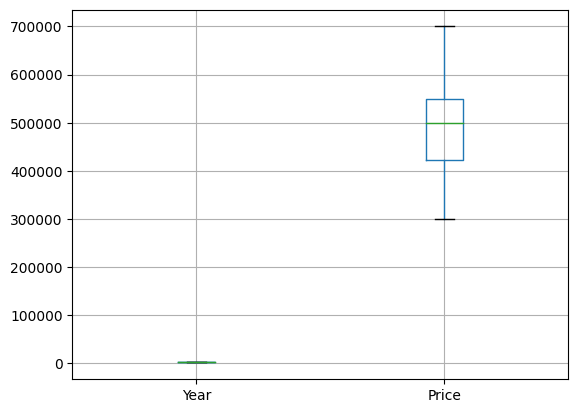

In [10]:
car_data.boxplot()
plt.show()

**Linear Regression**

In [11]:
X=car_data['Year']##independent variable
y=car_data['Price']##dependent variable

In [12]:
##converting X and y to NumPy arrays anad reshaping
X=np.array(X)
X=X.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [14]:
from sklearn import linear_model
lin_model=linear_model.LinearRegression()

In [15]:
model=lin_model.fit(X_train,y_train)

In [16]:
# Predict on the testing set
y_test_pred = model.predict(X_test)
y_test_pred

array([[420717.81628217],
       [539777.20294215],
       [420717.81628217],
       [420717.81628217],
       [500090.74072215],
       [420717.81628217],
       [500090.74072215],
       [579463.66516215],
       [619150.12738213],
       [500090.74072215],
       [420717.81628217],
       [381031.35406217],
       [539777.20294215],
       [420717.81628217],
       [500090.74072215],
       [500090.74072215],
       [500090.74072215],
       [341344.89184219],
       [460404.27850217],
       [579463.66516215],
       [579463.66516215],
       [500090.74072215],
       [500090.74072215],
       [500090.74072215],
       [500090.74072215],
       [500090.74072215],
       [460404.27850217],
       [420717.81628217]])

In [18]:
## R2 score
from sklearn.metrics import r2_score
print('R2 score is:',r2_score(y_test,y_test_pred))

R2 score is: 0.6727697922780109


Model is good

In [21]:
# Predict the price of a 2022 model
year_2022 = [[2022]]
predicted_price_2022 = model.predict(year_2022)
print("Predicted price of a 2022 model:", predicted_price_2022[0])

Predicted price of a 2022 model: [698523.05182213]


**Lasso Regression**

In [22]:
from sklearn.linear_model import Lasso

In [23]:
# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [24]:
# Predict on the testing set
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_lasso

array([420717.88056949, 539777.15206732, 420717.88056949, 420717.88056949,
       500090.72823471, 420717.88056949, 500090.72823471, 579463.57589993,
       619149.99973252, 500090.72823471, 420717.88056949, 381031.45673688,
       539777.15206732, 420717.88056949, 500090.72823471, 500090.72823471,
       500090.72823471, 341345.03290427, 460404.3044021 , 579463.57589993,
       579463.57589993, 500090.72823471, 500090.72823471, 500090.72823471,
       500090.72823471, 500090.72823471, 460404.3044021 , 420717.88056949])

In [25]:
##R2 score
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
test_r2_lasso

0.6727695599509684

Model is good

In [26]:
# Predict the price of a 2022 model
year_2022 = [[2022]]
predicted_price_2022 = lasso_model.predict(year_2022)
print("Predicted price of a 2022 model:", predicted_price_2022[0])


Predicted price of a 2022 model: 698522.8473977447


R2 score in linear regression is 0.6727697922780109 and R2 score in lasso regression is 0.672769559950968.Since the R2score for linear regression is slightly higher than the R2 score for Lasso regression, linear regression appears to have a slightly better fit to the data based on this evaluation metric.

But Predicted price of a 2022 model in linear regression is 698523.05182213 and Predicted price of a 2022 model in lasso regression is 698522.8473977447.The difference between the predicted prices from the two models is minimal, with the Lasso regression predicting a slightly lower price. Given the similarity in the predicted values, both models seem to perform comparably for this specific prediction.

